# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [66]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [67]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [68]:
reg = smf.ols('tip ~ net_bill + tip_pct', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     132.0
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.92e-39
Time:                        15:35:31   Log-Likelihood:                -334.69
No. Observations:                 244   AIC:                             675.4
Df Residuals:                     241   BIC:                             685.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1477      0.187      0.790      0.430      -0.220       0.516
net_bill       0.1231      0.008     15.315      0.000       0.107       0.139
tip_pct        3.8751      0.395      9.803      0.000       3.096       4.654
==============================================================================
Omnibus:                       30.078   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.867
Skew:                          -0.094   Prob(JB):                     1.76e-38
Kurtosis:                       7.131   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

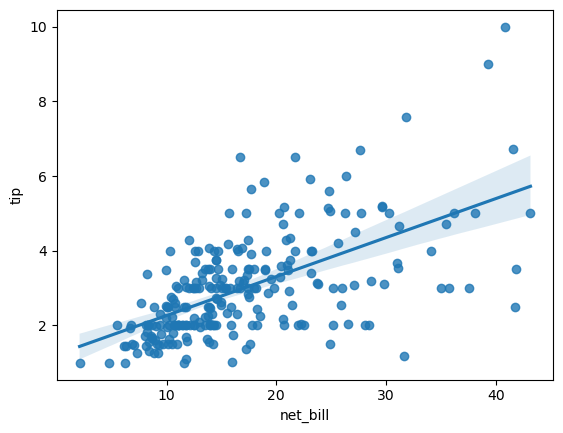

In [69]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

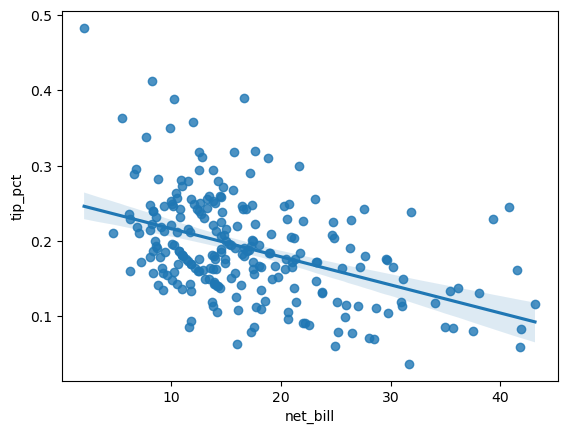

In [39]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [73]:
print('Ambos utilizam a mesma variavel net_bill e mudando a variavel do eixo y, muda os valores e o gráfico ')

Ambos utilizam a mesma variavel net_bill e mudando a variavel do eixo y, muda os valores e o gráfico 


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [50]:
pred = tips.head()
pred

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [51]:
reg.predict(tips)

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [52]:
type(reg)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [55]:
reg.fittedvalues

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [72]:
tip = ('tip_pct*net_bill')